In [130]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import pandas as pd
import time


In [3]:
driver = webdriver.Chrome()
driver.get('http://kpudhydrodata.kpud.org/APSFED_DISCHARGE.aspx')

In [158]:
discharge_stations = driver.find_element_by_id('lstRainID')
station_list = discharge_stations.text
stations_list = station_list.split('\n')
len(stations_list)

i=5
discharge_stations = driver.find_element_by_id('lstRainID')
Select(discharge_stations).select_by_index(i)


data_year = driver.find_element_by_id('lstBoxYear')
year_list = data_year.text
year_list = year_list.split('\n')
print('There are {} years of data for this station'.format(len(year_list)))

station_data = pd.DataFrame()
j=len(year_list)
for year in range(j):
    print('Year {} of {}'.format(year, j))
    data_year = driver.find_element_by_id('lstBoxYear')
    Select(data_year).select_by_index(year)
    time.sleep(2)

    data_table = driver.find_element_by_id('GridView1')
    data_list = data_table.text
    data_list = data_list.split('\n')
    data =  pd.DataFrame([x.split(' ')[:4] for x in data_list[1:]])


    cols = ['Date', 'Avg Discharge (cfs)','Max Discharge (cfs)','Min Discharge (cfs)']


    data.columns = cols
    data['Station'] = stations_list[i]
    station_data = station_data.append(data)

There are 30 years of data for this station
Year 0 of 30
Year 1 of 30
Year 2 of 30
Year 3 of 30
Year 4 of 30
Year 5 of 30
Year 6 of 30
Year 7 of 30
Year 8 of 30
Year 9 of 30
Year 10 of 30
Year 11 of 30
Year 12 of 30
Year 13 of 30
Year 14 of 30
Year 15 of 30
Year 16 of 30
Year 17 of 30
Year 18 of 30
Year 19 of 30
Year 20 of 30
Year 21 of 30
Year 22 of 30
Year 23 of 30
Year 24 of 30
Year 25 of 30
Year 26 of 30
Year 27 of 30
Year 28 of 30
Year 29 of 30


In [159]:
station_data.index = station_data.Date
station_data.index = pd.to_datetime(station_data.index)

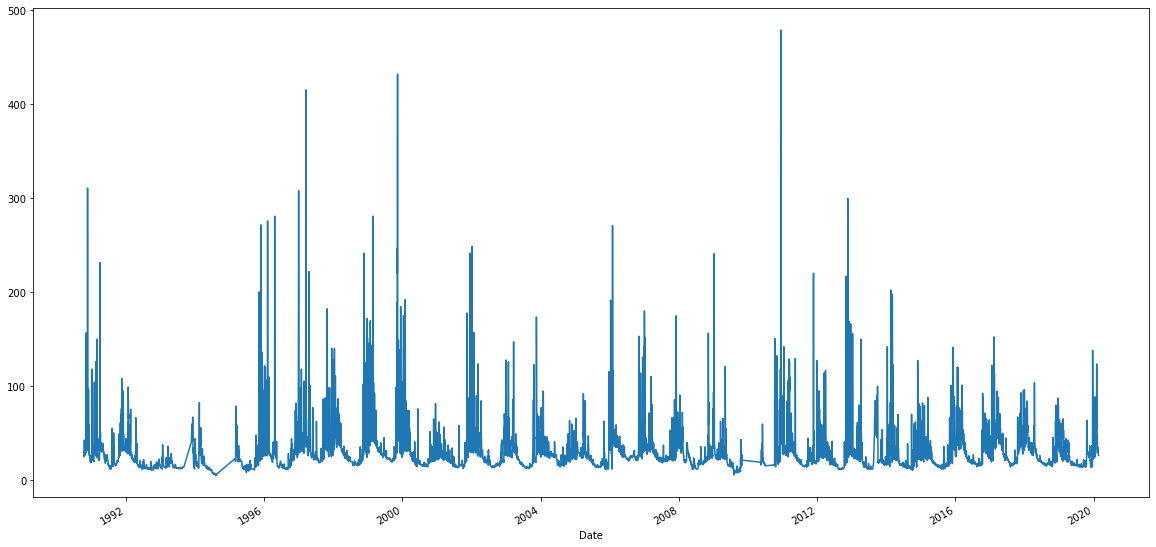

In [160]:
station_data['Avg Discharge (cfs)'].astype(float).plot(figsize=(20,10))

In [152]:
station_data.index = pd.to_datetime(station_data.index)

In [8]:
from bs4 import BeautifulSoup

In [88]:
data_list[0]

'Date Avg Discharge (cfs) Max Discharge (cfs) Min Discharge (cfs)'

In [79]:
data.index = data.iloc[:,0]

,Date,Avg Discharge (cfs),Max Discharge (cfs),Min Discharge (cfs)
0,10/01/2017,3.76,4.50,3.25
1,10/02/2017,3.88,4.50,2.97
2,10/03/2017,4.04,4.85,3.54
3,10/04/2017,4.04,5.21,3.25
4,10/05/2017,4.10,5.21,3.25
...,...,...,...,...
360,09/26/2018,3.82,4.50,3.08
361,09/27/2018,3.57,4.25,2.86
362,09/28/2018,3.45,4.00,3.08
363,09/29/2018,3.40,4.00,2.86
